# OmniSci SQL editor

Ibis is a great tool for abtracting SQL queries, and for more programmatic query generation. However, there are times when it is still useful to quickly test raw SQL. Fortunately, we can use an ibis connection and some display magics to accomplish this.

First, we make the relevant imports:

In [1]:
import ibis
import jupyterlab_omnisci

Now we make a connection to the database:

In [2]:
omnisci_cli = ibis.mapd.connect(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)

And verify that the connection worked

In [3]:
omnisci_cli.list_tables()

['flights_donotmodify',
 'contributions_donotmodify',
 'tweets_nov_feb',
 'zipcodes_orig',
 'zipcodes',
 'demo_vote_clean',
 'us_faults',
 'zipcodes_2017']

Let's create a SQL editor from this client:

In [53]:
w = jupyterlab_omnisci.OmniSciSQLEditorRenderer(omnisci_cli)
w

In [54]:
db_conf = dict(
    host='metis.mapd.com', user='mapd', password='HyperInteractive',
    port=443, database='mapd', protocol= 'https'
)
mapd = ibis.mapd.connect(**db_conf)

def editor(query):
    w = jupyterlab_omnisci.OmniSciSQLEditorRenderer(omnisci_cli, query)
    display(w)
    display(mapd.sql(w.query))
    return w

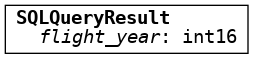

In [55]:
editor('select flight_year from flights_donotmodify limit 1');

In [49]:
type(w)

jupyterlab_omnisci.magics.OmniSciSQLEditorRenderer

That gave us a blank canvas for getting data from the database. However, it can be nice to start from an ibis expreesion and then vary it from there. To do that, we can give an expression as the second argument for the `OmniSciSQLEditorRenderer`:

In [7]:
table = omnisci_cli.table('tweets_nov_feb')
expr = table[table.goog_x.name('x'), table.goog_y.name('y'), table.tweet_id.name('rowid')]

jupyterlab_omnisci.OmniSciSQLEditorRenderer(omnisci_cli, expr)